# Introduction to Quantum Computing with Qiskit

This tutorial will guide you through the basics of quantum computing using IBM's Qiskit framework. Qiskit is an open-source quantum computing software development framework for leveraging today's quantum processors and conducting research in quantum computing.

## What is Quantum Computing?

Quantum computing uses quantum-mechanical phenomena such as superposition and entanglement to perform computation. While classical computers use bits (0s and 1s), quantum computers use quantum bits or qubits, which can exist in multiple states simultaneously.

## Setup and Initial Configuration

First, let's install Qiskit and its dependencies and import all the libraries we'll need throughout this tutorial:

In [ ]:
# Install missing modules
%pip install qiskit qiskit-aer matplotlib numpy

# Import all required libraries for the entire notebook
# Core Qiskit imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer  
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city, plot_state_hinton, plot_state_qsphere, plot_state_paulivec

# For Quantum Phase Estimation
from qiskit.circuit.library import PhaseEstimation
from qiskit.circuit import Parameter

# Additional utilities
import numpy as np
import matplotlib.pyplot as plt

# Check the Qiskit version
import qiskit
print("Qiskit version:", qiskit.__version__)

Note: you may need to restart the kernel to use updated packages.
Qiskit version: 2.0.0


## Qiskit Grammar

Understanding the structure and syntax of Qiskit code is essential for creating quantum circuits effectively. Here's a breakdown of key Qiskit grammar concepts:

### 1. Importing Qiskit

The standard way to import Qiskit components:
```python
# Basic imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, execute
from qiskit_aer import Aer  # For simulators
from qiskit.visualization import plot_histogram, plot_bloch_multivector
```

### 2. Circuit Creation Syntax

There are multiple ways to create a quantum circuit:

```python
# Method 1: Specify number of qubits and classical bits
circuit = QuantumCircuit(n_qubits, n_classical_bits)

# Method 2: Create with explicit registers
qreg = QuantumRegister(3, name='q')     # 3-qubit register named 'q'
creg = ClassicalRegister(2, name='c')   # 2-bit classical register named 'c'
circuit = QuantumCircuit(qreg, creg)
```

### 3. Adding Gates and Operations

Gates follow this general syntax pattern:
```python
circuit.gate_name(parameters, qubit_indices)
```

Examples:
```python
# Single-qubit gates
circuit.h(0)             # Hadamard on qubit 0
circuit.x(1)             # X gate on qubit 1
circuit.rx(theta, 2)     # Parameterized rotation around X axis on qubit 2

# Multi-qubit gates
circuit.cx(0, 1)         # CNOT with control=qubit 0, target=qubit 1
circuit.ccx(0, 1, 2)     # Toffoli gate
circuit.swap(0, 1)       # SWAP gate between qubits 0 and 1
```

### 4. Measurement Syntax

```python
# Measure single qubit
circuit.measure(0, 0)    # Measure qubit 0 into classical bit 0

# Measure multiple qubits
circuit.measure([0, 1, 2], [0, 1, 2])   # Measure qubits 0,1,2 into bits 0,1,2

# Measure all qubits
circuit.measure_all()    # Add measurements for all qubits
```

### 5. Simulation and Execution

```python
# Create a simulator backend
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the backend
transpiled_circuit = transpile(circuit, simulator)

# Run the simulation
job = simulator.run(transpiled_circuit, shots=1000)

# Get the results
result = job.result()
counts = result.get_counts(circuit)
```

### 6. Circuit Composition

Qiskit allows combining circuits in several ways:

```python
# Method 1: Compose - adds second circuit to the end of first
combined = circuit1.compose(circuit2)

# Method 2: Tensor product - creates a new circuit with combined systems
combined = circuit1.tensor(circuit2)

# Method 3: Append new gate instructions
circuit1.append(custom_gate, qargs=[0, 1])
```

### 7. Control Flow in Circuits

Modern Qiskit versions support control flow operations:

```python
# Conditional operations using if_test
with circuit.if_test((classical_register, 1)) as else_:
    circuit.x(0)  # Apply X if register value is 1
with else_:
    circuit.z(0)  # Apply Z if register value is not 1

# For-loop in circuit
with circuit.for_loop(range(4)) as i:
    circuit.h(i)  # Apply H to qubits 0,1,2,3
```

### 8. Parameters in Circuits

Creating parameterized circuits for variational algorithms:

```python
from qiskit.circuit import Parameter

# Create parameter objects
theta = Parameter('θ')
phi = Parameter('φ')

# Create a circuit with parameters
param_circuit = QuantumCircuit(1)
param_circuit.rx(theta, 0)
param_circuit.rz(phi, 0)

# Bind parameters to values
bound_circuit = param_circuit.assign_parameters({theta: 0.5, phi: 0.3})
```

## Qiskit Circuit Elements

Quantum circuits in Qiskit are built from several fundamental elements that allow us to create and manipulate quantum states. Let's explore these basic building blocks:

### 1. Circuit Components

- **Qubits**: Quantum bits, the fundamental units of quantum information
- **Classical bits**: Used to store measurement results
- **Registers**: Collections of qubits (QuantumRegister) or classical bits (ClassicalRegister)

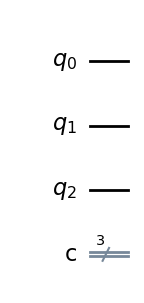

In [25]:
# Create a circuit with explicit registers
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Define registers
qreg = QuantumRegister(3, name='q')    # 3-qubit quantum register
creg = ClassicalRegister(3, name='c')  # 3-bit classical register

# Create circuit with these registers
qc_elements = QuantumCircuit(qreg, creg)

# Draw the empty circuit to see the register layout
qc_elements.draw(output='mpl')

### 2. Basic Quantum Gates

Quantum gates are the building blocks of quantum circuits. Here are the most commonly used gates:

#### Single-Qubit Gates:
- **Pauli-X**: Bit flip (NOT gate) - rotates the state around the X-axis by π radians
- **Pauli-Y**: Rotates around the Y-axis by π radians
- **Pauli-Z**: Phase flip - rotates around the Z-axis by π radians
- **Hadamard (H)**: Creates superposition by rotating from Z to X basis
- **Phase (S)**: Applies a π/2 phase rotation
- **T-gate**: Applies a π/4 phase rotation

#### Multi-Qubit Gates:
- **CNOT (CX)**: Controlled-NOT gate - flips the target if control is |1⟩
- **CZ**: Controlled-Z gate - applies Z gate on target if control is |1⟩
- **SWAP**: Exchanges states between two qubits
- **Toffoli (CCX)**: Controlled-controlled-NOT gate

Let's visualize these gates:

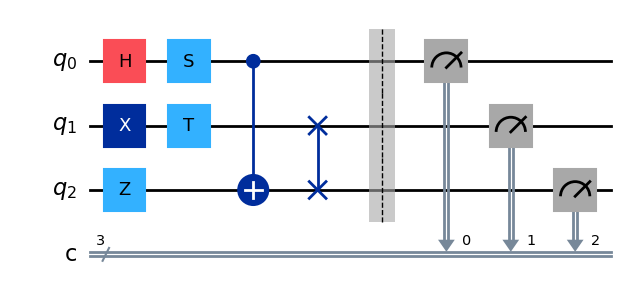

In [ ]:
# Let's demonstrate some basic gates
qc_elements = QuantumCircuit(3, 3)

# Single-qubit gates
qc_elements.h(0)       # Hadamard gate on qubit 0
qc_elements.x(1)       # X gate (NOT) on qubit 1
qc_elements.z(2)       # Z gate on qubit 2
qc_elements.s(0)       # Phase (S) gate on qubit 0
qc_elements.t(1)       # T gate on qubit 1

# Multi-qubit gates
qc_elements.cx(0, 2)   # CNOT with qubit 0 as control and qubit 2 as target
qc_elements.swap(1, 2) # SWAP qubits 1 and 2

# Add barriers to visually separate regions of the circuit
qc_elements.barrier()

# Measurement operations
qc_elements.measure([0, 1, 2], [0, 1, 2])

# Draw the circuit
qc_elements.draw(output='mpl')

### 3. Rotation Gates

Qiskit provides rotation gates that allow for precise control of qubit states on the Bloch sphere:

- **RX(θ)**: Rotation around the X-axis by angle θ
- **RY(θ)**: Rotation around the Y-axis by angle θ
- **RZ(θ)**: Rotation around the Z-axis by angle θ

These gates are especially useful for creating arbitrary single-qubit states:

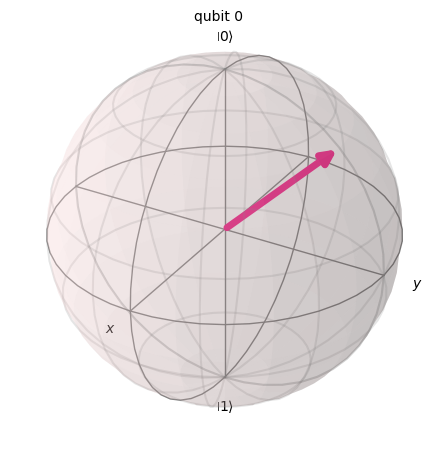

In [46]:
# Demonstration of rotation gates
import numpy as np
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import Aer

# Create a circuit with rotation gates
rot_circuit = QuantumCircuit(1)

# Apply rotation gates to reach different points on the Bloch sphere
rot_circuit.ry(np.pi/4, 0)    # Rotate around Y-axis by π/4
rot_circuit.rz(np.pi/2, 0)    # Rotate around Z-axis by π/2

# Draw the circuit
rot_circuit.draw(output='mpl')

# Simulate the circuit to get the statevector
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(rot_circuit).result()
statevector = result.get_statevector()

# Plot the state on the Bloch sphere
plot_bloch_multivector(statevector)

### 4. Circuit Composition

Qiskit allows you to compose circuits together, making it easy to build modular quantum algorithms:

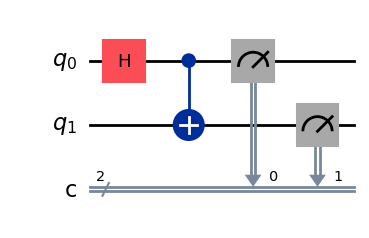

In [28]:
# Circuit composition demonstration

# Create a Bell pair preparation circuit
bell_prep = QuantumCircuit(2, name='Bell')
bell_prep.h(0)
bell_prep.cx(0, 1)

# Create a measurement circuit
meas = QuantumCircuit(2, 2, name='Measurement')
meas.measure([0, 1], [0, 1])

# Compose them into a complete circuit
complete_circuit = bell_prep.compose(meas)

# Draw the complete circuit
complete_circuit.draw(output='mpl')

### 5. Visualizing Quantum States

Qiskit provides several tools for visualizing quantum states. Let's create a few different states and see how they look:


Ground State |00⟩ State:


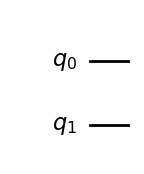

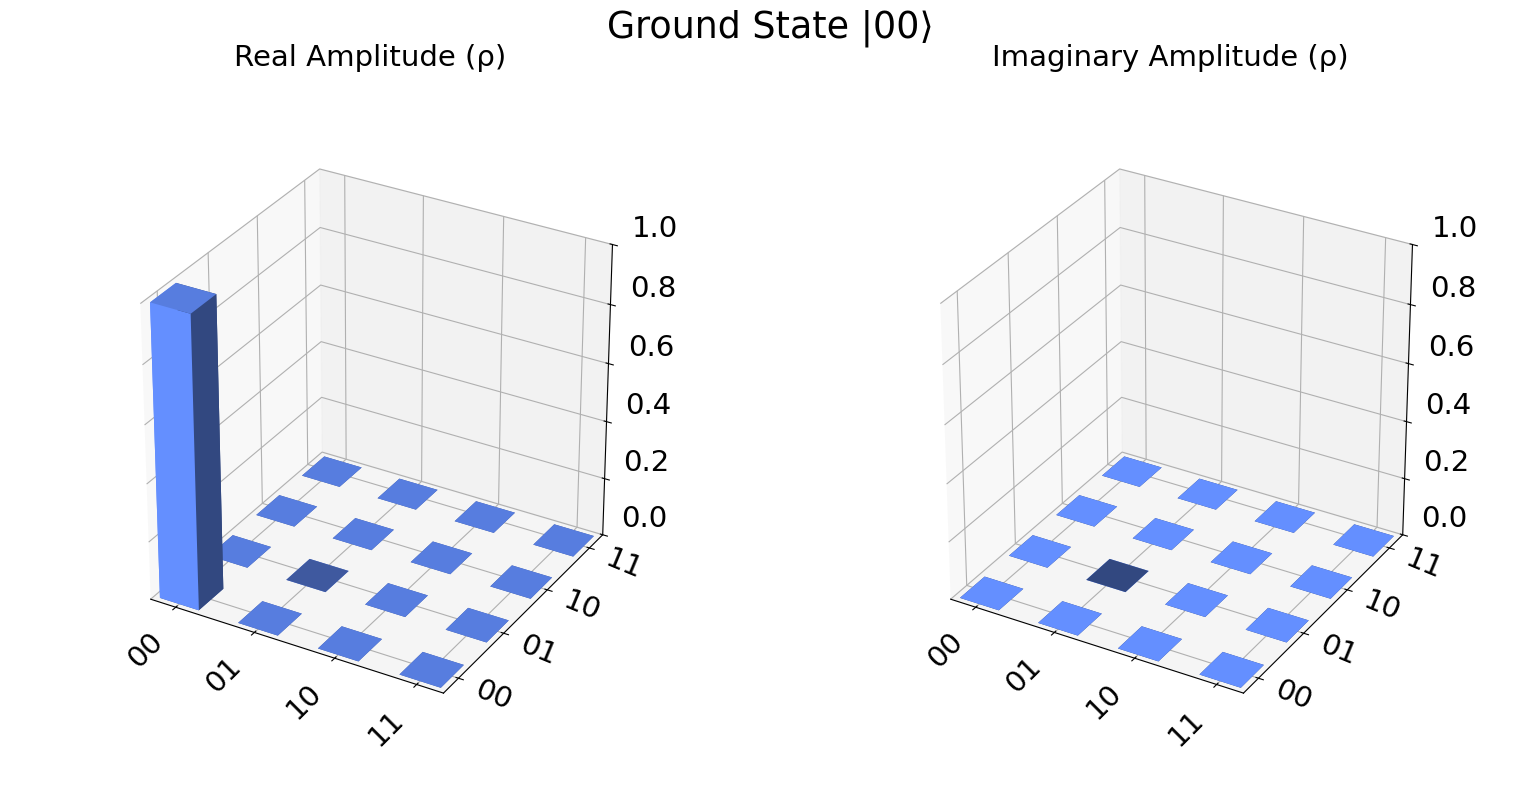


Excited State |11⟩ State:


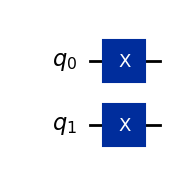

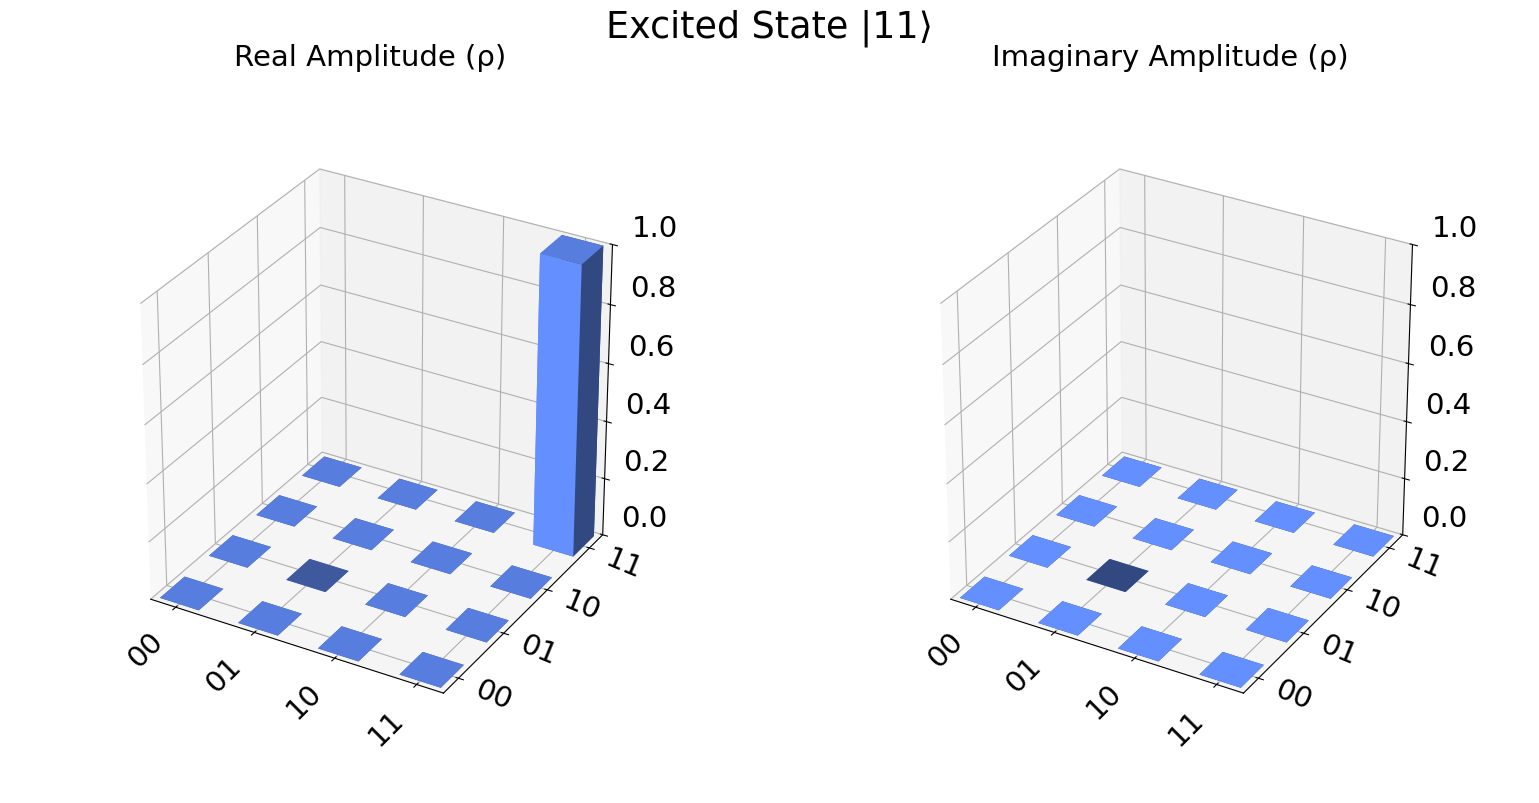


Bell State State:


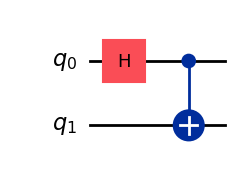

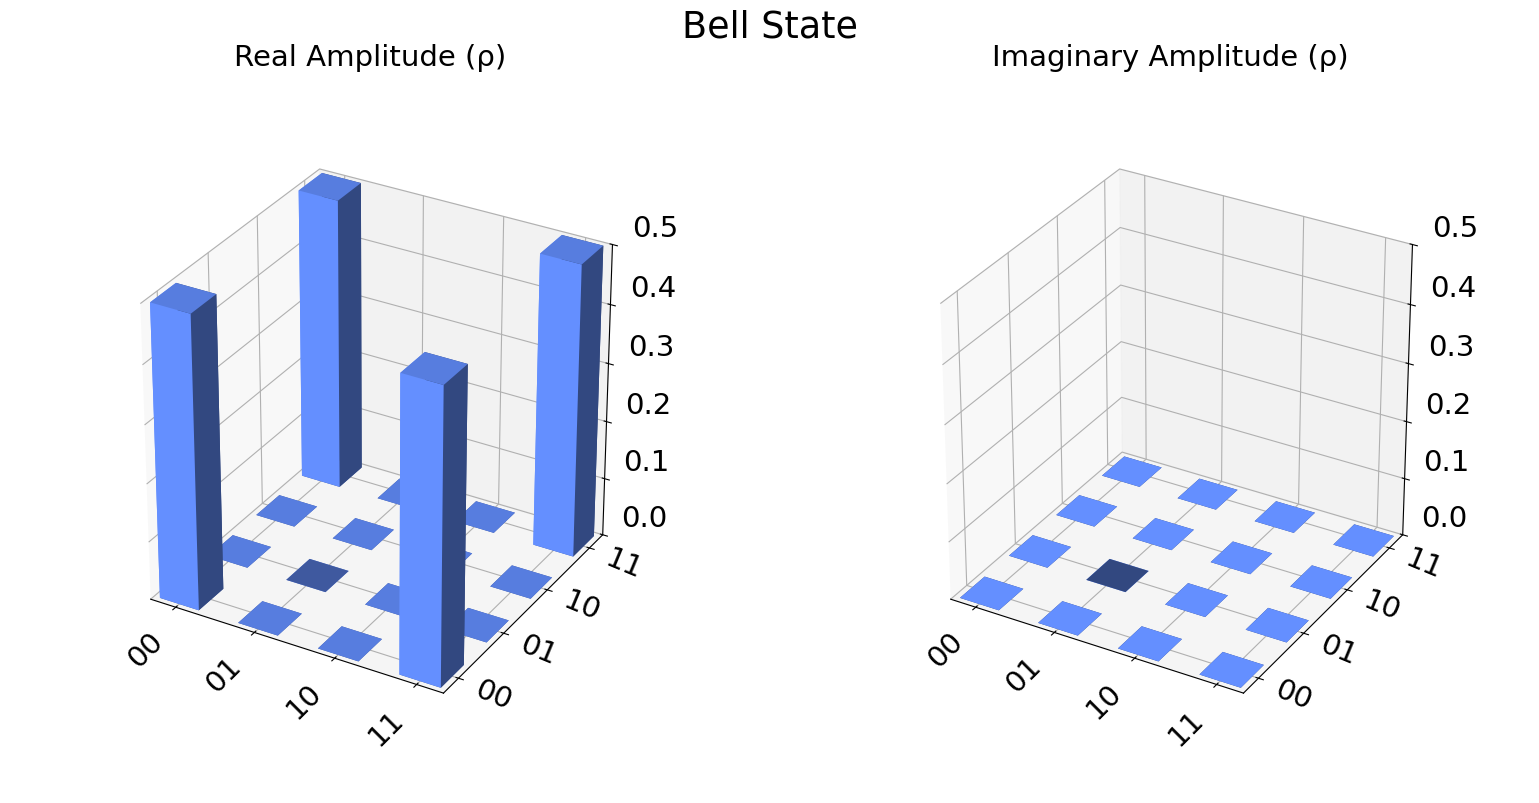


Equal Superposition State:


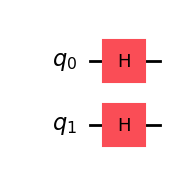

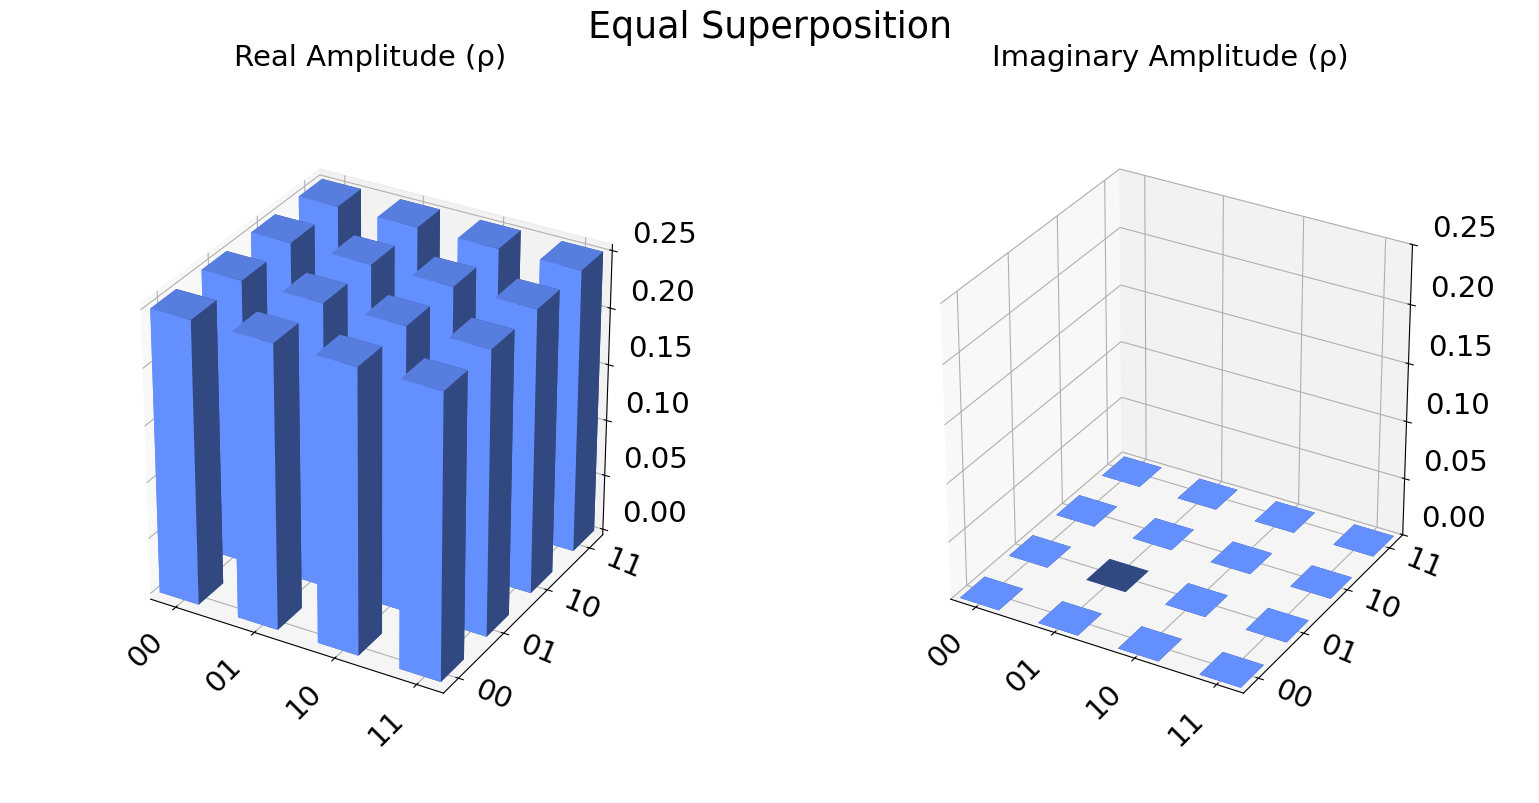

In [29]:
# Create circuits with different quantum states
from qiskit.visualization import plot_state_city

# Define a function to create and visualize a state
def create_and_visualize_state(circuit_name, circuit_function):
    # Create the circuit
    qc = QuantumCircuit(2)
    circuit_function(qc)  # Apply the circuit operations
    
    # Simulate to get the statevector
    simulator = Aer.get_backend('statevector_simulator')
    result = simulator.run(qc).result()
    state = result.get_statevector()
    
    # Print information and visualize
    print(f"\n{circuit_name} State:")
    display(qc.draw(output='mpl'))
    display(plot_state_city(state, title=circuit_name))

# Create and visualize different states
# 1. |00⟩ state (ground state)
create_and_visualize_state("Ground State |00⟩", lambda qc: None)

# 2. |11⟩ state 
create_and_visualize_state("Excited State |11⟩", lambda qc: qc.x([0, 1]))

# 3. Bell state (|00⟩ + |11⟩)/√2
create_and_visualize_state("Bell State", lambda qc: [qc.h(0), qc.cx(0, 1)])

# 4. Equal superposition state
create_and_visualize_state("Equal Superposition", lambda qc: qc.h([0, 1]))

### 6. Conditional Operations

Qiskit allows you to perform operations conditionally based on measurement results:

## Quantum State Preparations and Manipulations

Before diving into complete algorithms, let's see how to create and manipulate various quantum states:

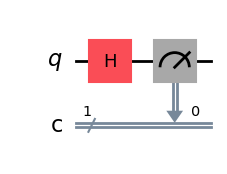

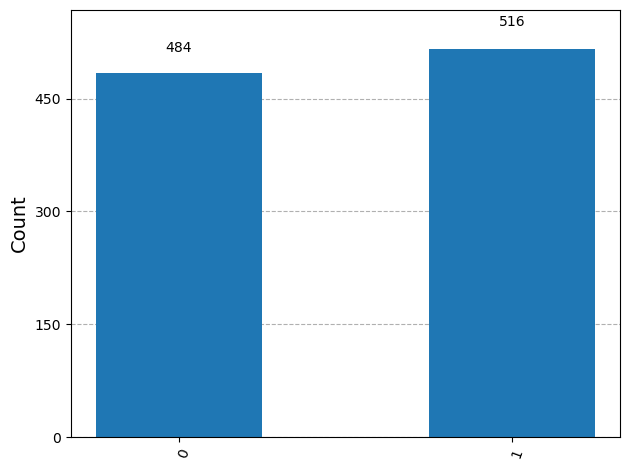

In [30]:
# Creating a simple superposition with Qiskit
qc = QuantumCircuit(1, 1) # 1 qubit, 1 classical bit
qc.h(0)  # Apply Hadamard gate to create superposition
qc.measure(0, 0)

# Display the circuit diagram
display(qc.draw(output='mpl'))

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()

# Plot the results
plot_histogram(counts)

The above circuit creates a superposition state where the qubit has equal probability of being measured as 0 or 1.

## Creating Quantum Entanglement

Entanglement is a quantum phenomenon where multiple qubits become correlated in such a way that the quantum state of each qubit cannot be described independently of the others.

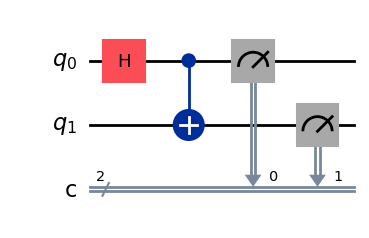

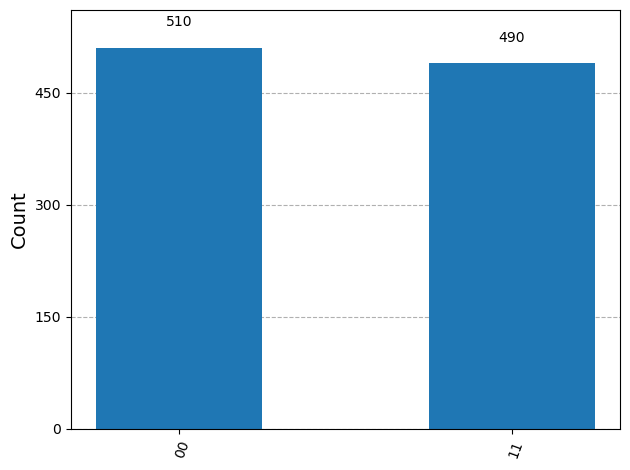

In [31]:
# Creating entanglement between two qubits (Bell state)
qc_entangle = QuantumCircuit(2, 2)
qc_entangle.h(0)  # Put qubit 0 in superposition
qc_entangle.cx(0, 1)  # CNOT with qubit 0 as control and qubit 1 as target
qc_entangle.measure([0, 1], [0, 1])

# Display the circuit
display(qc_entangle.draw(output='mpl'))

# Simulate
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc_entangle, shots=1000)
result = job.result()
counts = result.get_counts()

# Plot results - should see only |00⟩ and |11⟩ states
plot_histogram(counts)

## Implementing a Variational Quantum Classifier

Variational quantum circuits are parameterized circuits used as the foundation for many quantum machine learning models. Let's implement a simple variational quantum classifier:

In [32]:
# Implementing a simple Variational Quantum Classifier
import pennylane as qml
import numpy as np

dev = qml.device("default.qubit", wires=2)  # Create a 2-qubit simulator

@qml.qnode(dev)  # Transform the function into a quantum node
def variational_classifier(params, features):
    # DATA ENCODING LAYER - Encode classical data as quantum states
    qml.RX(features[0], wires=0)  # Encode feature 1 as X-rotation on qubit 0
    qml.RX(features[1], wires=1)  # Encode feature 2 as X-rotation on qubit 1
    
    # VARIATIONAL LAYER 1 - First parameterized layer
    qml.RY(params[0], wires=0)    # Y-rotation on qubit 0
    qml.RY(params[1], wires=1)    # Y-rotation on qubit 1
    qml.CNOT(wires=[0, 1])        # Entangle qubits 0 and 1
    
    # VARIATIONAL LAYER 2 - Additional parameterized layer for more expressivity
    qml.RY(params[2], wires=0)    # Second Y-rotation on qubit 0
    qml.RY(params[3], wires=1)    # Second Y-rotation on qubit 1
    
    # MEASUREMENT - The expectation value provides the classifier output
    return qml.expval(qml.PauliZ(0))  # Measure expectation value of Z on first qubit

# Initialize random parameters - in practice these would be optimized
params = np.random.uniform(0, 2*np.pi, size=4)  # 4 rotation angles

# Test sample feature vector
features = np.array([0.2, 0.5])  # Sample input data

# Execute the quantum circuit and get the prediction
prediction = variational_classifier(params, features)
print(f"Classifier prediction: {prediction}")

# Visualize the quantum circuit
print("\nQuantum Circuit Diagram:")
print(qml.draw(variational_classifier)(params, features))

Classifier prediction: -0.6445579477018759

Quantum Circuit Diagram:
0: ──RX(0.20)──RY(2.32)─╭●──RY(6.25)─┤  <Z>
1: ──RX(0.50)──RY(1.39)─╰X──RY(1.95)─┤     


## Amplitude Encoding Implementation

Amplitude encoding is an efficient technique to represent classical vectors in quantum states, requiring only log₂(n) qubits for an n-dimensional vector:

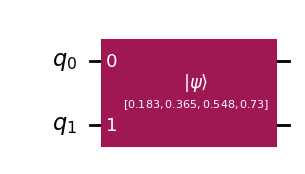

In [33]:
# Amplitude encoding example - Encodes an n-dimensional vector into log₂(n) qubits
def amplitude_encoding_circuit(data_vector):
    # Normalize the vector - quantum states must have unit norm
    normalized = data_vector / np.linalg.norm(data_vector)
    
    # Calculate required qubits - need log₂(n) qubits to represent n amplitudes
    n_qubits = int(np.ceil(np.log2(len(normalized))))
    
    # Pad vector if needed - ensure dimension is 2^n
    padding_size = 2**n_qubits - len(normalized)
    if padding_size > 0:
        normalized = np.pad(normalized, (0, padding_size))
    
    # Create circuit for state preparation
    qc = QuantumCircuit(n_qubits)
    
    # Initialize the quantum state with our normalized vector
    # This abstracts away the complex sequence of gates needed for state preparation
    qc.initialize(normalized, range(n_qubits))
    
    return qc

# Example with a sample vector [0.1, 0.2, 0.3, 0.4]
# This 4D vector can be encoded in just log₂(4) = 2 qubits
sample_data = np.array([0.1, 0.2, 0.3, 0.4])
encoding_circuit = amplitude_encoding_circuit(sample_data)

# Display the circuit
display(encoding_circuit.draw(output='mpl'))

# The amplitudes of the resulting quantum state correspond to our data vector
# State = 0.182|00⟩ + 0.364|01⟩ + 0.547|10⟩ + 0.729|11⟩ (after normalization)

## Creating Your First Quantum Circuit

Let's create a simple quantum circuit with a single qubit:

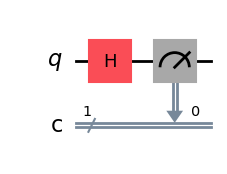

In [34]:
# Create a Quantum Circuit with 1 qubit and 1 classical bit
circuit = QuantumCircuit(1, 1)

# Add a Hadamard gate to the qubit
circuit.h(0)

# Measure the qubit
circuit.measure(0, 0)

# Draw the circuit
circuit.draw(output='mpl')

### Understanding the Circuit

In the circuit above:
1. We created a quantum circuit with 1 qubit and 1 classical bit
2. Applied a Hadamard (H) gate to the qubit, putting it in a superposition state
3. Measured the qubit and stored the result in the classical bit

## Running the Circuit on a Simulator

Now let's execute this circuit on a simulator and see the results:

Measurement outcomes: {'0': 478, '1': 522}


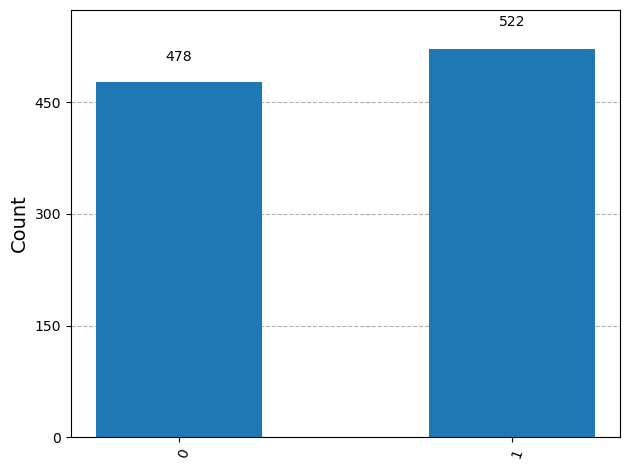

In [35]:
from qiskit_aer import AerSimulator

# Use Aer's qasm_simulator
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Run the circuit on the simulator
job = simulator.run(compiled_circuit, shots=1000)

# Get the result
result = job.result()

# Get the counts (measurement outcomes)
counts = result.get_counts(circuit)
print("Measurement outcomes:", counts)

# Plot the results
plot_histogram(counts)

### Interpreting the Results

You should see approximately a 50/50 distribution between 0 and 1 outcomes. This is because the Hadamard gate creates a superposition state where the qubit has equal probability of being measured as 0 or 1.

## Quantum Gates and Operations

Let's explore some common quantum gates and operations:

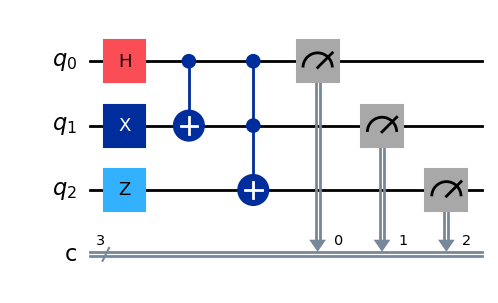

In [36]:
# Create a circuit with 3 qubits
qc = QuantumCircuit(3, 3)

# Apply various gates
qc.h(0)  # Hadamard gate on qubit 0
qc.x(1)  # NOT gate (X gate) on qubit 1
qc.z(2)  # Z gate on qubit 2
qc.cx(0, 1)  # CNOT gate with control qubit 0 and target qubit 1
qc.ccx(0, 1, 2)  # Toffoli (CCNOT) gate

# Measure all qubits
qc.measure([0, 1, 2], [0, 1, 2]) # Measure qubits 0, 1, and 2 into classical bits 0, 1, and 2

# Draw the circuit
qc.draw(output='mpl')

### Common Quantum Gates

- **X gate**: Quantum equivalent of the NOT gate, it flips the state of a qubit
- **H gate**: Hadamard gate, creates superposition
- **Z gate**: Phase flip gate
- **CNOT (CX) gate**: Controlled-NOT gate, flips the target qubit if the control qubit is |1⟩
- **Toffoli (CCX) gate**: Double-controlled NOT gate, flips the target qubit if both control qubits are |1⟩

## Quantum Teleportation

Let's implement the quantum teleportation algorithm, which demonstrates entanglement and quantum information transfer:

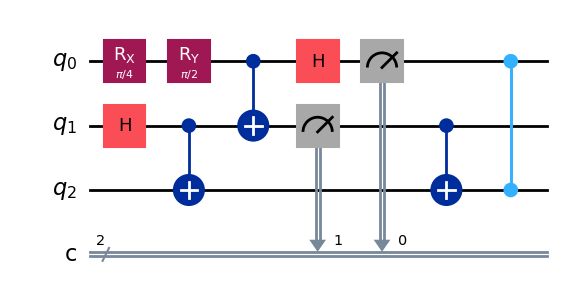

In [37]:
# Create a teleportation circuit
teleport = QuantumCircuit(3, 2)

# Prepare an arbitrary state in the first qubit
teleport.rx(np.pi/4, 0)
teleport.ry(np.pi/2, 0)

# Create Bell pair between qubits 1 and 2
teleport.h(1)
teleport.cx(1, 2)

# Begin teleportation protocol
teleport.cx(0, 1)
teleport.h(0)

# Measure qubits 0 and 1
teleport.measure(0, 0)
teleport.measure(1, 1)

# Apply corrections on qubit 2 (target)
teleport.cx(1, 2)
teleport.cz(0, 2)

# Draw the circuit
teleport.draw(output='mpl')

### Explanation of the Quantum Teleportation Circuit

Quantum teleportation is a protocol that transfers a quantum state from one qubit to another without physically moving the qubit itself. The circuit above implements the full quantum teleportation protocol:

1. **State Preparation (Qubits 0, 1, 2)**:
   - Qubit 0: Contains the state we want to teleport (`rx` and `ry` gates prepare an arbitrary state)
   - Qubits 1 and 2: Will be used for the teleportation channel

2. **Create Entanglement (Qubits 1 and 2)**:
   - The Hadamard gate (`h`) on qubit 1 creates a superposition
   - The CNOT gate (`cx`) between qubits 1 and 2 creates a Bell pair (entangled state)
   - This entangled pair serves as the quantum channel for teleportation

3. **Encode & Measure (Qubits 0 and 1)**:
   - The CNOT gate between qubits 0 and 1 entangles the input state with the Bell pair
   - The Hadamard gate on qubit 0 completes the encoding
   - Measuring qubits 0 and 1 gives us two classical bits of information
   - This measurement collapses the quantum state but encodes information needed for reconstruction

4. **Conditional Operations (Qubit 2)**:
   - The `cx` gate applies an X correction on qubit 2 if the measurement of qubit 1 is 1
   - The `cz` gate applies a Z correction on qubit 2 if the measurement of qubit 0 is 1
   - These operations reconstruct the original state on qubit 2

The remarkable aspect of quantum teleportation is that the original quantum state is perfectly transferred to qubit 2, even though we never directly interact with both qubits 0 and 2. The entangled pair serves as the communication channel, and only two classical bits of information need to be transmitted.

## Grover's Algorithm Example

Grover's algorithm is a quantum search algorithm that provides quadratic speedup compared to classical search algorithms:

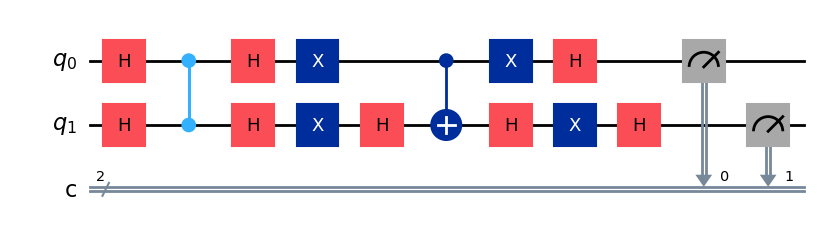

In [38]:
# Define the number of qubits
n = 2

# Create a circuit for Grover's algorithm
grover = QuantumCircuit(n, n)

# Initialize with Hadamard gates
for i in range(n):
    grover.h(i)

# Oracle - mark the solution (e.g., |11>)
grover.cz(0, 1)  # This marks state |11> by applying a phase flip

# Diffusion operator (Amplification step)
for i in range(n):
    grover.h(i)
    grover.x(i)

# Apply multi-controlled Z gate
grover.h(1)
grover.cx(0, 1)
grover.h(1)

# Revert X gates
for i in range(n):
    grover.x(i)
    grover.h(i)

# Measure
grover.measure(range(n), range(n))

# Draw the circuit
grover.draw(output='mpl')

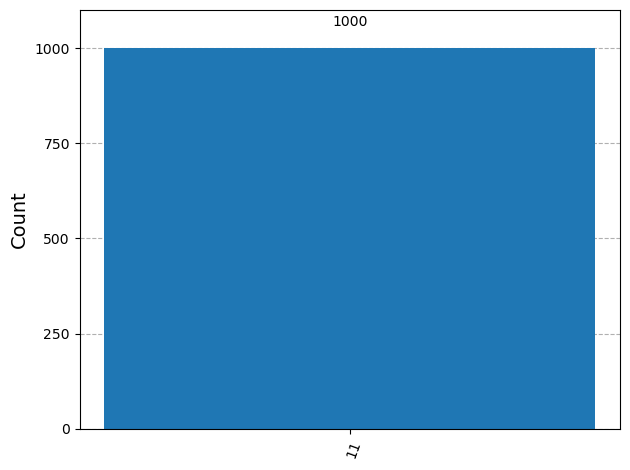

In [39]:
# Simulate Grover's algorithm
simulator = AerSimulator()
compiled_grover = transpile(grover, simulator)
job = simulator.run(compiled_grover, shots=1000)
result = job.result()
counts = result.get_counts(grover)
plot_histogram(counts)

## Quantum Phase Estimation

Quantum Phase Estimation (QPE) is a quantum algorithm used to estimate the eigenvalue (phase) of an eigenvector of a unitary operator:

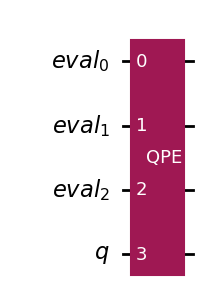

In [40]:
# Create a simple unitary (phase rotation)
phase_circuit = QuantumCircuit(1)
theta = Parameter('θ')
phase_circuit.p(theta, 0)

# Number of counting qubits (precision)
num_counting_qubits = 3

# Create the phase estimation circuit
phase = np.pi/4  # The phase we want to estimate
# Correct way to bind parameters in newer Qiskit versions
bound_circuit = phase_circuit.assign_parameters({theta: phase})
qpe = PhaseEstimation(num_counting_qubits, bound_circuit)

# Draw the circuit
qpe.draw(output='mpl')

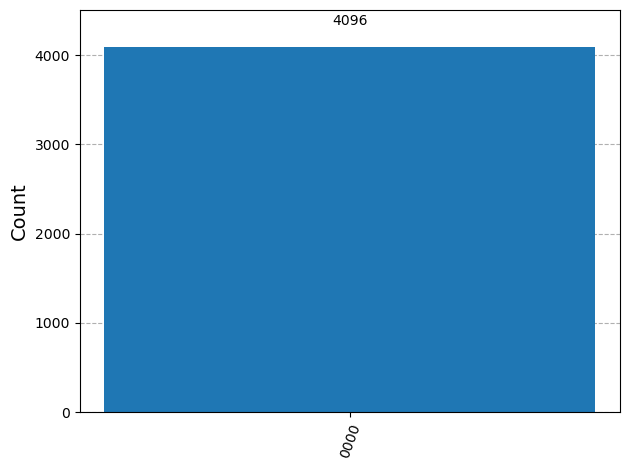

In [41]:
# Simulate the QPE circuit - using a fresh approach to ensure it works
# Create a new QuantumCircuit for the simulation
from qiskit import QuantumRegister, ClassicalRegister

# First create a circuit from the PhaseEstimation instance
qpe_qr = QuantumRegister(num_counting_qubits + 1)
qpe_cr = ClassicalRegister(num_counting_qubits + 1)
qpe_circuit = QuantumCircuit(qpe_qr, qpe_cr)

# Get the instruction from the PhaseEstimation object and append to our circuit
qpe_circuit.append(qpe.to_instruction(), qpe_qr)

# Add measurement for all qubits
for i in range(num_counting_qubits + 1):
    qpe_circuit.measure(i, i)

# Simulate
simulator = AerSimulator()
compiled_qpe = transpile(qpe_circuit, simulator)
job = simulator.run(compiled_qpe, shots=4096)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Connecting to IBM Quantum

To run your circuits on real quantum hardware, you'll need to create an IBM Quantum account and get an API token. Here's how to connect to IBM Quantum:

In [42]:
# To connect to IBM Quantum, you need to install additional packages:
# %pip install qiskit-ibm-provider qiskit-ibm-runtime

print("To run on real quantum hardware:")
print("1. Install qiskit-ibm-provider package using: %pip install qiskit-ibm-provider")
print("2. Register at https://quantum-computing.ibm.com/")
print("3. Get your API token from your account page")
print("4. Use the following code to save your account:")
print("   from qiskit_ibm_provider import IBMProvider")
print("   IBMProvider.save_account(token='YOUR_API_TOKEN', overwrite=True)")

To run on real quantum hardware:
1. Install qiskit-ibm-provider package using: %pip install qiskit-ibm-provider
2. Register at https://quantum-computing.ibm.com/
3. Get your API token from your account page
4. Use the following code to save your account:
   from qiskit_ibm_provider import IBMProvider
   IBMProvider.save_account(token='YOUR_API_TOKEN', overwrite=True)


## Running on Real Quantum Hardware

Once you've installed the IBM provider package and connected to IBM Quantum, you can run circuits on real quantum computers:

In [43]:
# Example code to run on real quantum hardware (commented out)
# Uncomment and run after installing qiskit-ibm-provider and saving your account

# from qiskit_ibm_provider import IBMProvider
# from qiskit_ibm_provider.ibm_backend import least_busy

# # Get the provider and find available backends
# provider = IBMProvider()
# backend_list = provider.backends(filters=lambda x: x.configuration().n_qubits >= 1 
#                               and not x.configuration().simulator 
#                               and x.status().operational==True)
# backend = least_busy(backend_list)
# print("Least busy backend:", backend)

# # Create a simple circuit
# small_circuit = QuantumCircuit(1, 1)
# small_circuit.h(0)
# small_circuit.measure(0, 0)

# # Transpile for the backend
# transpiled_circuit = transpile(small_circuit, backend)
# # Run on real hardware
# job = backend.run(transpiled_circuit, shots=1024)

# # Get results when job completes
# result = job.result()
# counts = result.get_counts()
# plot_histogram(counts)

## Advanced: Quantum Error Correction

Quantum systems are highly sensitive to noise. Let's create a simple bit-flip code for quantum error correction:

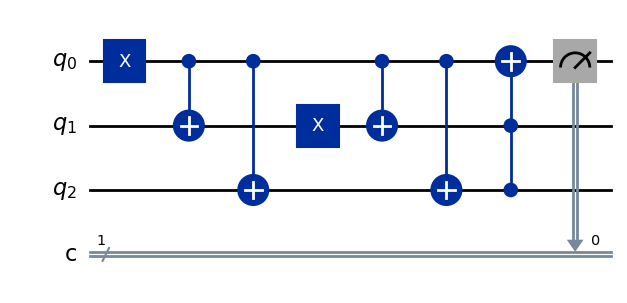

In [44]:
# Create a simple 3-qubit bit-flip code
qc_error_correction = QuantumCircuit(3, 1)

# Encode a single logical qubit into 3 physical qubits
qc_error_correction.x(0)  # Start with |1⟩ state
qc_error_correction.cx(0, 1)  # Copy to second qubit
qc_error_correction.cx(0, 2)  # Copy to third qubit

# Simulate an error (bit flip) on the second qubit
qc_error_correction.x(1)  # This is our error

# Error detection using syndrome measurement
qc_error_correction.cx(0, 1)
qc_error_correction.cx(0, 2)
qc_error_correction.ccx(1, 2, 0)  # Correct qubit 0 if qubits 1 and 2 disagree

# Measure the corrected qubit
qc_error_correction.measure(0, 0)

# Draw the circuit
qc_error_correction.draw(output='mpl')

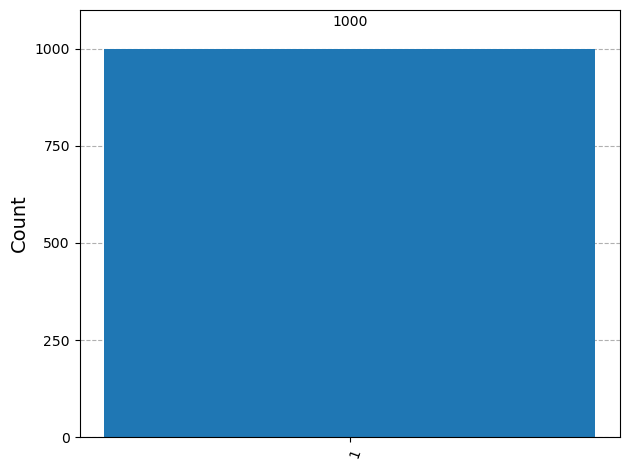

In [45]:
# Simulate the error correction circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc_error_correction, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Resources for Further Learning

- [Qiskit Textbook](https://qiskit.org/textbook/)
- [Qiskit Documentation](https://qiskit.org/documentation/)
- [IBM Quantum Experience](https://quantum-computing.ibm.com/)
- [Qiskit Slack Community](https://qiskit.slack.com/)
- [Quantum Computing Stack Exchange](https://quantumcomputing.stackexchange.com/)

## Conclusion

This tutorial has introduced you to the basics of quantum computing using Qiskit. You've learned how to create quantum circuits, apply quantum gates, run simulations, and implement some famous quantum algorithms. As quantum computing continues to evolve, the skills you've learned here will provide a solid foundation for further exploration.